# PS4 GAMES DATA EXPLORATION

We will be analyzing PS4 game data collected from three different sites, namely ps-timetracker.com, gamepressure.com, and VGchartz.com.

**Part 1**: `Data Collection`

**Part 2**: `Data Preprocessing`

**Part 3**: `Data Analysis`

This particular notebook contains the **Part 2** and **Part 3** which are data preprocessing and data analysis. We first perform data preprocessesing on the collected data from web scraping in the first notebook, and then we perform data analysis and gather insights based on the visualized data.

# PART 2: Data Preprocessing

### Import all necessary packages

`numpy` - a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

`pandas` -  an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

`json` - a lightweight data-interchange format.

`datetime` - supplies classes for manipulating dates and times.

`seaborn` - a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

`matplotlib` - a plotting library for the Python programming language and its numerical mathematics extension NumPy.

`re` - provides regular expression matching operations.

`wordcloud` - A little word cloud generator in Python

`PIL` - also known as Python Imaging Library,  is a library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. 

`collections` - implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.

In [47]:
import numpy as np
import pandas as pd
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from collections import Counter

Read the data from the JSON Files

In [48]:
df_ps4_times = pd.read_json('Datasets/ps4-times.json')
df_ps4_games = pd.read_json('Datasets/ps4-games.json')
df_ps4_games_new = pd.read_json('ps4-games-missing.json')
df_ps4_sales = pd.read_json('Datasets/ps4-sales.json')

### DATASETS

#### PS4 TIMES 

`Year`- year that the game was on the top 100 list

`Month`- month that the game was on the top 100 list

`Rank`- rank of the game when it was on the top 100 list

`Chart_Movement` - movement of the game on the top 100 list in relation to past lists

`Title` - title of the game

`Hours_played` - number of hours players spent playing the game.

`Player` - number of Players that contributed to the Hours played.

`Sessions` - number of sessions of the game that were open within the given period of time.

`Avg_Session` - average length of a game session

In [49]:
df_ps4_times.head(5)

,Year,Month,Rank,Chart_Movement,Title,Hours_Played,Players,Sessions,Avg_Session
0,2021,1,1,+2,Grand Theft Auto V,86512,4783,47759,1:49
1,2021,1,2,=,Fortnite,84011,4310,64301,1:19
2,2021,1,3,+1,Call of Duty®: Black Ops Cold War,77621,3720,51710,1:31
3,2021,1,4,+1,FIFA 21,74020,2094,43892,1:42
4,2021,1,5,+1,Call of Duty®: Modern Warfare®,73665,4471,51551,1:26


In [50]:
df_ps4_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            300 non-null    int64 
 1   Month           300 non-null    int64 
 2   Rank            300 non-null    int64 
 3   Chart_Movement  300 non-null    object
 4   Title           300 non-null    object
 5   Hours_Played    300 non-null    int64 
 6   Players         300 non-null    int64 
 7   Sessions        300 non-null    int64 
 8   Avg_Session     300 non-null    object
dtypes: int64(6), object(3)
memory usage: 21.2+ KB


#### PS4 Games

`Title` - title of the game

`Tags` - tags related to game genre/gameplay

`Publisher` - publisher of the game

`Mode` - single player, multiplayer or both

`Release_Date_Day` - day the game was released

`Release_Date_Month` - month the game was released

`Release_Date_Year` - year the game was released

`Game_Description` - gameplay details

`Expected_Rating` - rating based on votes of users before the game was released

`Current_Rating` - rating based on votes of users after the game was released

In [51]:
df_ps4_games.head(5)

,Title,Tags,Developer,Publisher,Mode,Release_Date_Day,Release_Date_Month,Release_Date_Year,Game_Description,Expected_Rating,Current_Rating
0,Cyberpunk 2077,"[RPG, FPP, cyberpunk, science fiction, sandbox...",CD Projekt RED,CD Projekt RED,single player,10.0,December,2020,Cyberpunk 2077 is a first-person RPG with an o...,7.8,3.600
1,Horizon: Zero Dawn,"[Action, TPP, science fiction, Post Apocalypse...",Guerrilla Games,Sony Interactive Entertainment,single player,28.0,February,2017,Horizon: Zero Dawn is a PlayStation 4 exclusiv...,7.2,8.015
2,Days Gone,"[Action, TPP, zombie, Post Apocalypse, sandbox...",Bend Studio,Sony Interactive Entertainment,single player,26.0,April,2019,Days Gone is an action game for PS4 which take...,7.4,7.750
3,Assassin's Creed: Valhalla,"[RPG, TPP, Stealth, the middle ages, sandbox, ...",Ubisoft,Ubisoft,single player,10.0,November,2020,Assassin's Creed: Valhalla is the twelfth majo...,5.6,7.265
4,Resident Evil Village,"[Action, FPP, survival horror, horror, action ...",Capcom,Capcom,single player,7.0,May,2021,Resident Evil Village is another part of the s...,3.8,NaN


In [52]:
df_ps4_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               479 non-null    object 
 1   Tags                479 non-null    object 
 2   Developer           479 non-null    object 
 3   Publisher           479 non-null    object 
 4   Mode                469 non-null    object 
 5   Release_Date_Day    438 non-null    float64
 6   Release_Date_Month  445 non-null    object 
 7   Release_Date_Year   479 non-null    object 
 8   Game_Description    479 non-null    object 
 9   Expected_Rating     479 non-null    float64
 10  Current_Rating      340 non-null    float64
dtypes: float64(3), object(8)
memory usage: 41.3+ KB


#### PS4 Sales

`Publisher` - console the game was published for

`Title` - title of the game
 
`Total_Shipped` - total copies of the game shipped

`Total_Sales` - total sales of the base game

`NA_Sales` -  total sales of the base game in North America

`PAL_Sales` -  total sales of the base game in PAL

`Japan_Sales` -  total sales of the base game in Japan

`Other_Sales` - total sales outside NA, PAL, and Japan

In [53]:
df_ps4_sales.head(5)

,Publisher,Title,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
0,XOne,Grand Theft Auto V,N/A,8.72m,4.70m,3.25m,0.01m,0.76m
1,XOne,Call of Duty: Black Ops 3,N/A,7.37m,4.63m,2.04m,0.02m,0.68m
2,XOne,Call of Duty: WWII,N/A,6.23m,3.75m,1.91m,N/A,0.57m
3,XOne,Red Dead Redemption 2,N/A,5.77m,3.76m,1.47m,N/A,0.54m
4,XOne,Minecraft,N/A,5.43m,3.23m,1.71m,N/A,0.49m


In [54]:
df_ps4_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17298 entries, 0 to 17297
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Publisher      17298 non-null  object
 1   Title          17298 non-null  object
 2   Total_Shipped  17298 non-null  object
 3   Total_Sales    17298 non-null  object
 4   NA_Sales       17298 non-null  object
 5   PAL_Sales      17298 non-null  object
 6   Japan_Sales    17298 non-null  object
 7   Other_Sales    17298 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


### Normalizing Titles

There are different versions of the titles per dataset so we will use regex to set a single version of the title. We perform cleaning on the titles across three datasets so that they would have the same title on the same observation and we can combine them later. We will be removing symbols such as ™ ® and setting all letters to lowercase.

#### PS4 Times Titles

In [55]:
Title_cleaned = []
for index, row in df_ps4_times.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = re.sub(r":|™|®|–|-|!|(\')", " ", row['Title'])
    row['Title'] = re.sub(r"\ss\s", "s ", row['Title'])    
    row['Title'] = re.sub(r"\s{2,}", " ", row['Title'])
    row['Title'] = re.sub(r"\s$", "", row['Title'])
    #print(row['Title'])
    Title_cleaned.append(row['Title'].strip())
df_ps4_times['Title'] = Title_cleaned

In [56]:
df_ps4_times['Title'] = df_ps4_times['Title'].replace('black desert','black desert online')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('call of duty black ops 4','call of duty black ops iiii')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('dying light the following enhanced edition','dying light the following')    
df_ps4_times['Title'] = df_ps4_times['Title'].replace('efootball pes 2021 season update','efootball pes 2021')    
df_ps4_times['Title'] = df_ps4_times['Title'].replace('final fantasy xiv','final fantasy xiv a realm reborn')    
df_ps4_times['Title'] = df_ps4_times['Title'].replace('marvels spider man','spider man')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('marvels spider man miles morales','spider man miles morales')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('outriders demo','outriders')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('overwatch origins edition','overwatch')    
df_ps4_times['Title'] = df_ps4_times['Title'].replace('paladins','paladins champions of the realm')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('rise of the tomb raider','rise of the tomb raider 20 year celebration')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('rust beta','rust')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('skyrim','the elder scrolls v skyrim special edition')
df_ps4_times['Title'] = df_ps4_times['Title'].replace('world of tanks','world of tanks console')

We will aslo remove the share play app as this is not a game

In [57]:
df_ps4_times

,Year,Month,Rank,Chart_Movement,Title,Hours_Played,Players,Sessions,Avg_Session
0,2021,1,1,+2,grand theft auto v,86512,4783,47759,1:49
1,2021,1,2,=,fortnite,84011,4310,64301,1:19
2,2021,1,3,+1,call of duty black ops cold war,77621,3720,51710,1:31
3,2021,1,4,+1,fifa 21,74020,2094,43892,1:42
4,2021,1,5,+1,call of duty modern warfare,73665,4471,51551,1:26
...,...,...,...,...,...,...,...,...,...
295,2021,3,96,NEW,dying light the following,2756,253,1479,1:52
296,2021,3,97,-5,world of tanks console,2737,244,2098,1:19
297,2021,3,98,NEW,final fantasy xv,2734,265,1468,1:52
298,2021,3,99,-5,uncharted the nathan drake collection,2734,353,1825,1:30


#### PS4 Games Titles

In [58]:
Title_cleaned = []
for index, row in df_ps4_games.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = re.sub(r":|™|®|–|-|!|(\')", " ", row['Title'])
    row['Title'] = re.sub(r"\ss\s", "s ", row['Title'])    
    row['Title'] = re.sub(r"\s{2,}", " ", row['Title'])
    row['Title'] = re.sub(r"\s$", "", row['Title'])
    Title_cleaned.append(row['Title'].strip())
df_ps4_games['Title'] = Title_cleaned
#df_ps4_games.count()

In [59]:
Title_cleaned = []
for index, row in df_ps4_games_new.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = re.sub(r":|™|®|–|-|!|(\')", " ", row['Title'])
    row['Title'] = re.sub(r"\ss\s", "s ", row['Title'])    
    row['Title'] = re.sub(r"\s{2,}", " ", row['Title'])
    row['Title'] = re.sub(r"\s$", "", row['Title'])
    #print(row['Title'])
    Title_cleaned.append(row['Title'].strip())
df_ps4_games_new['Title'] = Title_cleaned
#df_ps4_games_new.head()


#### PS4 Sales Titles

In [60]:
Title_cleaned = []
for index, row in df_ps4_sales.iterrows():
    row['Title'] = row['Title'].lower()
    row['Title'] = row['Title'].replace(' read the review','')
    row['Title'] = re.sub(r":|™|®|–|-|!|(\')", " ", row['Title'])
    row['Title'] = re.sub(r"\ss\s", "s ", row['Title'])  
    row['Title'] = re.sub(r"\s{2,}", " ", row['Title'])
    row['Title'] = re.sub(r"\s$", "", row['Title'])
    #print(row['Title'])
    Title_cleaned.append(row['Title'].strip())
df_ps4_sales['Title'] = Title_cleaned

### Converting Sales to Numbers

Currently, Null values are set as strings. We will convert them to NaN.

In [61]:
df_ps4_sales = df_ps4_sales.replace("0.00m",np.NaN)
df_ps4_sales = df_ps4_sales.replace("N/A",np.NaN)
df_ps4_sales = df_ps4_sales.drop_duplicates()
df_ps4_sales

,Publisher,Title,Total_Shipped,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
0,XOne,grand theft auto v,NaN,8.72m,4.70m,3.25m,0.01m,0.76m
1,XOne,call of duty black ops 3,NaN,7.37m,4.63m,2.04m,0.02m,0.68m
2,XOne,call of duty wwii,NaN,6.23m,3.75m,1.91m,NaN,0.57m
3,XOne,red dead redemption 2,NaN,5.77m,3.76m,1.47m,NaN,0.54m
4,XOne,minecraft,NaN,5.43m,3.23m,1.71m,NaN,0.49m
...,...,...,...,...,...,...,...,...
17293,NS,zoids wild king of blast,NaN,NaN,NaN,NaN,NaN,NaN
17294,NS,zombie army trilogy,NaN,NaN,NaN,NaN,NaN,NaN
17295,NS,zombie gold rush,NaN,NaN,NaN,NaN,NaN,NaN
17296,NS,zombieland double tap road trip,NaN,NaN,NaN,NaN,NaN,NaN


We will remove the m or millions sign so that we only have float values.

In [62]:
Total_sales_cleaned = []
NA_sales_cleaned = []
PAL_sales_cleaned = []
Japan_sales_cleaned = []
Other_sales_cleaned = []
for index,row in df_ps4_sales.iterrows():
    
        if not pd.isna(row['Total_Sales']):
            row['Total_Sales'] = row['Total_Sales'].replace('m','')
        if not pd.isna(row['NA_Sales']):
            row['NA_Sales'] = row['NA_Sales'].replace('m','')
        if not pd.isna(row['PAL_Sales']):
            row['PAL_Sales'] = row['PAL_Sales'].replace('m','')
        if not pd.isna(row['Japan_Sales']):
            row['Japan_Sales'] = row['Japan_Sales'].replace('m','')
        if not pd.isna(row['Other_Sales']):
            row['Other_Sales'] = row['Other_Sales'].replace('m','')
        Total_sales_cleaned.append(float(row['Total_Sales']))
        NA_sales_cleaned.append(float(row['NA_Sales']))
        PAL_sales_cleaned.append(float(row['PAL_Sales']))
        Japan_sales_cleaned.append(float(row['Japan_Sales']))
        Other_sales_cleaned.append(float(row['Other_Sales']))
    
df_ps4_sales['Total_Sales'] = Total_sales_cleaned
df_ps4_sales['NA_Sales'] = NA_sales_cleaned
df_ps4_sales['PAL_Sales'] = PAL_sales_cleaned
df_ps4_sales['Japan_Sales'] = Japan_sales_cleaned
df_ps4_sales['Other_Sales'] = Other_sales_cleaned

We will rename the columns so we know that the values are in millions.

In [63]:
df_ps4_sales.columns =['Publisher', 'Title', 'Total_Shipped', 'Total_Sales (in m)', 'NA_Sales (in m)', 'PAL_Sales (in m)', 'Japan_Sales (in m)', 'Other_Sales (in m)']
df_ps4_sales

,Publisher,Title,Total_Shipped,Total_Sales (in m),NA_Sales (in m),PAL_Sales (in m),Japan_Sales (in m),Other_Sales (in m)
0,XOne,grand theft auto v,NaN,8.72,4.70,3.25,0.01,0.76
1,XOne,call of duty black ops 3,NaN,7.37,4.63,2.04,0.02,0.68
2,XOne,call of duty wwii,NaN,6.23,3.75,1.91,NaN,0.57
3,XOne,red dead redemption 2,NaN,5.77,3.76,1.47,NaN,0.54
4,XOne,minecraft,NaN,5.43,3.23,1.71,NaN,0.49
...,...,...,...,...,...,...,...,...
17293,NS,zoids wild king of blast,NaN,NaN,NaN,NaN,NaN,NaN
17294,NS,zombie army trilogy,NaN,NaN,NaN,NaN,NaN,NaN
17295,NS,zombie gold rush,NaN,NaN,NaN,NaN,NaN,NaN
17296,NS,zombieland double tap road trip,NaN,NaN,NaN,NaN,NaN,NaN


### Separating PS4 Sales

Since we are only interested in the PS4 console, we only get observations with PS4 as publisher.

In [64]:
df_ps4_drop_sales = df_ps4_sales[df_ps4_sales["Publisher"] == 'PS4']
df_ps4_drop_sales

,Publisher,Title,Total_Shipped,Total_Sales (in m),NA_Sales (in m),PAL_Sales (in m),Japan_Sales (in m),Other_Sales (in m)
1510,PS4,marvels spider man,20.00m,NaN,NaN,NaN,NaN,NaN
1511,PS4,grand theft auto v,NaN,19.39,6.06,9.71,0.60,3.02
1512,PS4,uncharted 4 a thiefs end,16.25m,NaN,NaN,NaN,NaN,NaN
1513,PS4,call of duty black ops 3,NaN,15.09,6.18,6.05,0.41,2.44
1514,PS4,red dead redemption 2,NaN,13.94,5.26,6.21,0.21,2.26
...,...,...,...,...,...,...,...,...
3782,PS4,ys memories of celceta kai,NaN,NaN,NaN,NaN,NaN,NaN
3783,PS4,yu gi oh legacy of the duelist,NaN,NaN,NaN,NaN,NaN,NaN
3784,PS4,yuppie psycho,NaN,NaN,NaN,NaN,NaN,NaN
3785,PS4,zombie army 4 dead war,NaN,NaN,NaN,NaN,NaN,NaN


### Converting average sessions into Seconds

Since the value of Avg_Session is not a primitive datatype, we convert it into seconds (int) so we can later on use this feature for visualization.

In [65]:
df_ps4_times

,Year,Month,Rank,Chart_Movement,Title,Hours_Played,Players,Sessions,Avg_Session
0,2021,1,1,+2,grand theft auto v,86512,4783,47759,1:49
1,2021,1,2,=,fortnite,84011,4310,64301,1:19
2,2021,1,3,+1,call of duty black ops cold war,77621,3720,51710,1:31
3,2021,1,4,+1,fifa 21,74020,2094,43892,1:42
4,2021,1,5,+1,call of duty modern warfare,73665,4471,51551,1:26
...,...,...,...,...,...,...,...,...,...
295,2021,3,96,NEW,dying light the following,2756,253,1479,1:52
296,2021,3,97,-5,world of tanks console,2737,244,2098,1:19
297,2021,3,98,NEW,final fantasy xv,2734,265,1468,1:52
298,2021,3,99,-5,uncharted the nathan drake collection,2734,353,1825,1:30


In [66]:
Avg_Session_Seconds = []
for index, row in df_ps4_times.iterrows():
    row['Avg_Session'] += ":00"
    h,m,s = row['Avg_Session'].split(':')
    row['Avg_Session'] = int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())
    Avg_Session_Seconds.append(row['Avg_Session'])

df_ps4_times["Avg_Session_Seconds"] = Avg_Session_Seconds

### Removing Unrelated Data

We will remove the share play as this is not a game.

In [67]:
df_ps4_times = df_ps4_times[df_ps4_times['Title']!="share play"]

### Combining games that appear multiple times on the top 100 list

The games recorded from the first quarter of 2021 can appear multiple times in the same dataset as it can still be on the list in the succeeding month/s. This can result to repetitive observations.

In order to fix this, we combine multiple observations of the same title and record the hours played, players, sessions, average session (in seconds) by finding the mean of the multiple observations.

In [68]:
df_ps4_times_combined = df_ps4_times.groupby('Title').agg(
    # Get max of the duration column for each group
    Hours_Played=('Hours_Played', 'mean'),
    Players=('Players', 'mean'),
    Sessions=('Sessions', 'mean'),  
    Avg_Session_Seconds=('Avg_Session_Seconds', 'mean'),  
    Count=('Title','count')
)

df_ps4_times_combined

,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count
Title,,,,,
apex legends,79539.000000,3134.666667,52955.666667,5420,3
ark survival evolved,29608.333333,854.333333,10634.666667,10080,3
assassins creed odyssey,6360.000000,424.666667,3168.000000,7260,3
assassins creed origins,3421.000000,281.000000,1777.000000,6960,3
assassins creed the ezio collection,3253.000000,174.000000,1474.000000,7980,1
...,...,...,...,...,...
warframe,5736.666667,315.333333,3394.333333,6120,3
watch dogs legion,4527.666667,701.000000,3218.000000,5480,3
we were here,2857.000000,1582.000000,2782.000000,3720,1


### Merging Datasets

 We will combine the two Game pressure datasets into one

In [69]:
df_ps4_games = df_ps4_games.append(df_ps4_games_new,ignore_index=True)

We will also combine all the datasets

In [70]:
df_ps4_combined = df_ps4_times_combined.merge(df_ps4_games, on='Title', how='left')
df_ps4_combined = df_ps4_combined.merge(df_ps4_drop_sales, on='Title', how='left')

In [71]:
df_ps4_combined

,Title,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count,Tags,Developer,Publisher_x,Mode,...,Game_Description,Expected_Rating,Current_Rating,Publisher_y,Total_Shipped,Total_Sales (in m),NA_Sales (in m),PAL_Sales (in m),Japan_Sales (in m),Other_Sales (in m)
0,apex legends,79539.000000,3134.666667,52955.666667,5420,3,"[Action, FPP, science fiction, play for free, ...",Respawn Entertainment,Electronic Arts Inc.,multiplayer,...,Apex Legends is a free-to-play online FPP shoo...,4.1,NaN,PS4,NaN,NaN,NaN,NaN,NaN,NaN
1,ark survival evolved,29608.333333,854.333333,10634.666667,10080,3,"[Action, FPP, dinosaurs, sandbox, RPG elements...",Studio Wildcard,Studio Wildcard,single / multiplayer,...,ARK: Survival Evolved is a sandbox survival si...,8.6,5.400,PS4,1.00m,NaN,NaN,NaN,NaN,NaN
2,assassins creed odyssey,6360.000000,424.666667,3168.000000,7260,3,"[RPG, TPP, Stealth, sandbox, Ancient history, ...",Ubisoft,Ubisoft,single player,...,Assassin's Creed Odyssey is the eleventh large...,7.3,7.165,PS4,NaN,3.18,1.18,1.40,0.09,0.51
3,assassins creed origins,3421.000000,281.000000,1777.000000,6960,3,"[Action, TPP, science fiction, Stealth, sandbo...",Ubisoft,Ubisoft,single player,...,Ubisoft bases its operations on both new and t...,8.3,8.250,PS4,NaN,4.06,1.22,2.11,0.11,0.63
4,assassins creed the ezio collection,3253.000000,174.000000,1474.000000,7980,1,"[Action, TPP, science fiction, Stealth, packag...",Ubisoft,Ubisoft,single player,...,Assassin's Creed: The Ezio Collection for PS4 ...,8.8,6.950,PS4,NaN,0.79,0.14,0.52,0.02,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,warframe,5736.666667,315.333333,3394.333333,6120,3,"[Action, TPP, science fiction, play for free, ...",Digital Extremes,Digital Extremes,massive online multiplayer,...,Warframe is a cooperative science-fiction shoo...,7.6,6.700,PS4,NaN,NaN,NaN,NaN,NaN,NaN
117,watch dogs legion,4527.666667,701.000000,3218.000000,5480,3,"[Action, TPP, cyberpunk, science fiction, Stea...",Ubisoft,Ubisoft,single / multiplayer,...,Watch Dogs Legion is an action game with an op...,4.4,6.940,PS4,NaN,NaN,NaN,NaN,NaN,NaN
118,we were here,2857.000000,1582.000000,2782.000000,3720,1,"[Puzzle, FPP, adventure elements, indie games,...",Total Mayhem Games,Total Mayhem Games,multiplayer,...,We Were Here is an unusual puzzle game for two...,6.6,6.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,world of tanks console,2650.000000,229.500000,1923.500000,5010,2,"[Simulation, tanks, play for free, co-op, MMO,...",Wargaming,Wargaming,massive online multiplayer,...,World of Tanks is a free-to-play MMO shooter i...,8.7,3.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 3: Data Analysis

In this part, we present different research questions based on the data gathered that is centered around PS4 games. In order to answer these questions, it is important to use the preprocessed data to form visualizations so we can gather insightsbased on the results.

## What are the games on the PS4 top 100 most played games (hours played) list for the first quarter of 2021?

To answer this question, we must sort the list of games in descending order by 'Hours_Played'.

In [72]:
df_ps4_combined = df_ps4_combined.sort_values(by=['Hours_Played'], ascending=False)
df_ps4_combined = df_ps4_combined.reset_index(drop=True)
df_ps4_combined

,Title,Hours_Played,Players,Sessions,Avg_Session_Seconds,Count,Tags,Developer,Publisher_x,Mode,...,Game_Description,Expected_Rating,Current_Rating,Publisher_y,Total_Shipped,Total_Sales (in m),NA_Sales (in m),PAL_Sales (in m),Japan_Sales (in m),Other_Sales (in m)
0,fortnite,93548.333333,4857.000000,71134.333333,4760,3,"[Action, zombie, sandbox, survival, co-op, MMO...",Epic Games,Epic Games,single / multiplayer,...,"Fortnite for PC, PS4 and XONE is a third-perso...",7.2,1.900,PS4,NaN,0.89,0.42,0.32,NaN,0.15
1,call of duty black ops cold war,84386.000000,4041.333333,54989.000000,5560,3,"[Action, FPP, cold war, FPS, RPG elements, net...",Treyarch / Raven Software,Activision Blizzard,single / multiplayer,...,Call of Duty: Black Ops - Cold War is the seve...,4.9,6.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,call of duty modern warfare,80789.333333,4774.666667,56655.666667,5160,3,"[Action, FPP, modern conflicts, FPS, network, ...",Infinity Ward,Activision Blizzard,single / multiplayer,...,Call of Duty: Modern Warfare is an FPS release...,4.6,7.645,PS4,NaN,NaN,NaN,NaN,NaN,NaN
3,apex legends,79539.000000,3134.666667,52955.666667,5420,3,"[Action, FPP, science fiction, play for free, ...",Respawn Entertainment,Electronic Arts Inc.,multiplayer,...,Apex Legends is a free-to-play online FPP shoo...,4.1,NaN,PS4,NaN,NaN,NaN,NaN,NaN,NaN
4,grand theft auto v,78739.333333,4935.666667,45556.000000,6240,3,"[Action, FPP, TPP, vehicles, Gangster, sandbox...",Rockstar Games,Rockstar Games,single player,...,Rockstar Games studio has a few acclaimed game...,7.8,8.950,PS4,NaN,19.39,6.06,9.71,0.60,3.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,world of tanks console,2650.000000,229.500000,1923.500000,5010,2,"[Simulation, tanks, play for free, co-op, MMO,...",Wargaming,Wargaming,massive online multiplayer,...,World of Tanks is a free-to-play MMO shooter i...,8.7,3.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,diablo iii reaper of souls ultimate evil edition,2593.500000,248.500000,1321.000000,7110,2,"[RPG, fantasy, hack'and'slash, Isometric view,...",Blizzard Entertainment,Activision Blizzard,single / multiplayer,...,Unleash hell in your living roomOver 15 millio...,6.0,7.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,detroit become human,2564.000000,387.000000,1440.000000,6420,1,"[Adventure, TPP, cyberpunk, science fiction, a...",Quantic Dream,Sony Interactive Entertainment,single player,...,Detroit: Become Human for PS4 is another adven...,9.1,7.305,PS4,3.20m,NaN,NaN,NaN,NaN,NaN
119,ea sports ufc 3,2509.500000,487.500000,2632.500000,3480,2,"[Sports, MMA, for 2 people, splitscreen, EA Play]",EA Sports,Electronic Arts Inc.,single / multiplayer,...,"As the title itself might suggest, EA Sports U...",7.3,5.400,PS4,NaN,0.97,0.40,0.41,0.01,0.16


For this question, we only need to acquire the 'Title' and 'Hours_Played' from the dataframe.

In [73]:
df_most_played = df_ps4_combined[['Hours_Played', 'Title']]
df_most_played

,Hours_Played,Title
0,93548.333333,fortnite
1,84386.000000,call of duty black ops cold war
2,80789.333333,call of duty modern warfare
3,79539.000000,apex legends
4,78739.333333,grand theft auto v
...,...,...
116,2650.000000,world of tanks console
117,2593.500000,diablo iii reaper of souls ultimate evil edition
118,2564.000000,detroit become human
119,2509.500000,ea sports ufc 3


We split the values in to y and x values for plotting.

In [74]:
x_values = df_most_played.index
y_values = df_most_played['Hours_Played']

In [75]:
x_values

RangeIndex(start=0, stop=121, step=1)

In [76]:
y_values

0      93548.333333
1      84386.000000
2      80789.333333
3      79539.000000
4      78739.333333
           ...     
116     2650.000000
117     2593.500000
118     2564.000000
119     2509.500000
120     2452.000000
Name: Hours_Played, Length: 121, dtype: float64

We display the bar graph for the top 100 most played games.

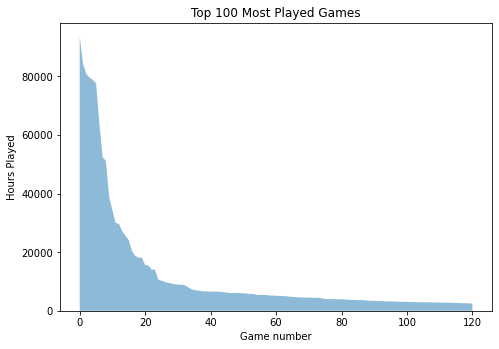

In [96]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('Game number')
plt.ylabel('Hours Played')
plt.title('Top 100 Most Played Games')
# generate graph
plt.stackplot(x_values, y_values, alpha=0.5) 
plt.show()


From the bar graph seen above, there is an extreme downward trend based on the distribution displayed with only the first percentile having relatively much higher hours played compared to the rest of the games in top 100 most played list.

This shows that there is a stark contrast between the top 10 when compared to the rest and the hours played that comes with the top 10 (or more) is much higher than the rest trailing behind. 

## What is the average session hours of players?

To answer this question, we need the players, title, and average session (in seconds) features. However, we have to convert the average session in seconds to hours.

In [98]:
df_players_ave_session = df_ps4_combined[['Players','Title','Avg_Session_Seconds']].sort_values(by=['Title'], ascending=True)
df_players_ave_session = df_players_ave_session.dropna()
df_players_ave_session = df_players_ave_session.reset_index(drop=True)
df_players_ave_session['Avg_Session_Hours'] = df_players_ave_session['Avg_Session_Seconds']/3600
df_players_ave_session

,Players,Title,Avg_Session_Seconds,Avg_Session_Hours
0,3134.666667,apex legends,5420,1.505556
1,854.333333,ark survival evolved,10080,2.800000
2,424.666667,assassins creed odyssey,7260,2.016667
3,281.000000,assassins creed origins,6960,1.933333
4,174.000000,assassins creed the ezio collection,7980,2.216667
...,...,...,...,...
116,315.333333,warframe,6120,1.700000
117,701.000000,watch dogs legion,5480,1.522222
118,1582.000000,we were here,3720,1.033333
119,229.500000,world of tanks console,5010,1.391667


We visualize the data.

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


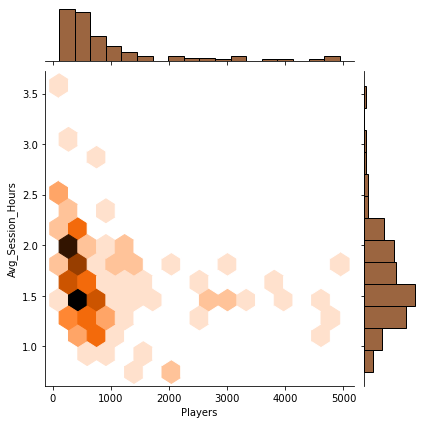

In [99]:
from scipy import stats
sns.jointplot("Players","Avg_Session_Hours", data=df_players_ave_session, kind="hex",color=(122/255,50/255,0/255))

With most games having an average player base of between 500 to 1000 players, The Average session lengths of players per game is roughly 1 to 2 hours. Only a few games housing a relatively small playerbase with an average session of 3 to 4 hours. 

## What are the genres of the most played games (hours played) on the PS4 for the first quarter of 2021? 

In this part of the notebook, we try to find the genres of the 100 most played games on the PS4 for the first quarter of 2021. We begin by separating the tags.

In [78]:
df_s4_Genre = df_ps4_combined['Tags']
df_s4_Genre

0      [Action, zombie, sandbox, survival, co-op, MMO...
1      [Action, FPP, cold war, FPS, RPG elements, net...
2      [Action, FPP, modern conflicts, FPS, network, ...
3      [Action, FPP, science fiction, play for free, ...
4      [Action, FPP, TPP, vehicles, Gangster, sandbox...
                             ...                        
116    [Simulation, tanks, play for free, co-op, MMO,...
117    [RPG, fantasy, hack'and'slash, Isometric view,...
118    [Adventure, TPP, cyberpunk, science fiction, a...
119    [Sports, MMA, for 2 people, splitscreen, EA Play]
120    [Action, FPP, fantasy, play for free, FPS, co-...
Name: Tags, Length: 121, dtype: object

We then select the first tag as the main genre.

In [79]:
Genres = []
for row in df_s4_Genre:
    if type(row) is list:
        Genres.append(row[0])
    else:
        Genres.append("Not indicated")
    
Genres

['Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Sports',
 'Arcade',
 'Adventure',
 'Action',
 'RPG',
 'Action',
 'Action',
 'Action',
 'RPG',
 'Action',
 'Action',
 'Action',
 'Action',
 'RPG',
 'Action',
 'Adventure',
 'Action',
 'Sports',
 'RPG',
 'RPG',
 'RPG',
 'Action',
 'Action',
 'Sports',
 'RPG',
 'Adventure',
 'Arcade',
 'Action',
 'Action',
 'RPG',
 'RPG',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'RPG',
 'Action',
 'RPG',
 'Fighting',
 'Action',
 'Action',
 'Racing',
 'Fighting',
 'Racing',
 'Racing',
 'Sports',
 'Action',
 'Action',
 'Action',
 'RPG',
 'RPG',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Racing',
 'Action',
 'Action',
 'Action',
 'Action',
 'RPG',
 'Action',
 'Action',
 'RPG',
 'RPG',
 'Action',
 'Fighting',
 'RPG',
 'Arcade',
 'RPG',
 'Action',
 'RPG',
 'Action',
 'RPG',
 'Action',
 'Action',
 'Simulation',
 'Action',
 'Action',
 'RPG',
 'Action',
 'Action',
 'Action',
 'Action',
 'Action',
 'Sports',

We use the Counter package to find the unique words and count the number of occurences.

In [80]:
c = Counter(Genres)
c

Counter({'Action': 69,
         'Sports': 7,
         'Arcade': 3,
         'Adventure': 4,
         'RPG': 25,
         'Fighting': 3,
         'Racing': 5,
         'Simulation': 4,
         'Puzzle': 1})

We place the data into a dataframe for easier visualization.

In [81]:
Genres_df = pd.DataFrame.from_dict(c, orient='index').sort_values(by=[0], ascending = False).reset_index()
Genres_df.columns=['Genre','Count']
Genres_df

,Genre,Count
0,Action,69
1,RPG,25
2,Sports,7
3,Racing,5
4,Adventure,4
5,Simulation,4
6,Arcade,3
7,Fighting,3
8,Puzzle,1


We use a pie chart to graph the data

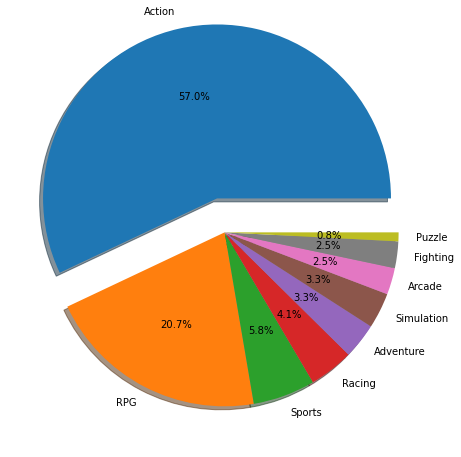

In [82]:
plt.figure(figsize=(10,8))
explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(Genres_df.Count, labels=Genres_df.Genre,autopct='%1.1f%%', explode=explode, shadow=True)
plt.show()

Based on the results, action is the top genre based on the number of games in the first quarter as it covers more than half of the most played games. Games in the action genre are then followed by RPG games. In conclusion, action games and RPG games make up the majority of the most played games in the first quarter of 2021.


## What is the average sessions in hours played per genre?

In order explore the answer, we need the title, tags, and average session in seconds features.

In [83]:
Genre_Hours_df = df_ps4_combined[['Title','Tags', 'Avg_Session_Seconds']].dropna()
Genre_Hours_df['Tags'] = Genres
#to be used in the next question (Avg_Session_Seconds to Hours)
Genre_Hours_df['Avg_Session_Hours'] = Genre_Hours_df['Avg_Session_Seconds']/3600 
Genre_Hours_df

,Title,Tags,Hours_Played,Avg_Session_Seconds,Avg_Session_Hours
0,fortnite,Action,93548.333333,4760,1.322222
1,call of duty black ops cold war,Action,84386.000000,5560,1.544444
2,call of duty modern warfare,Action,80789.333333,5160,1.433333
3,apex legends,Action,79539.000000,5420,1.505556
4,grand theft auto v,Action,78739.333333,6240,1.733333
...,...,...,...,...,...
116,world of tanks console,Simulation,2650.000000,5010,1.391667
117,diablo iii reaper of souls ultimate evil edition,RPG,2593.500000,7110,1.975000
118,detroit become human,Adventure,2564.000000,6420,1.783333
119,ea sports ufc 3,Sports,2509.500000,3480,0.966667


We only need to utilize the average session hours and tags features to visualize the data.

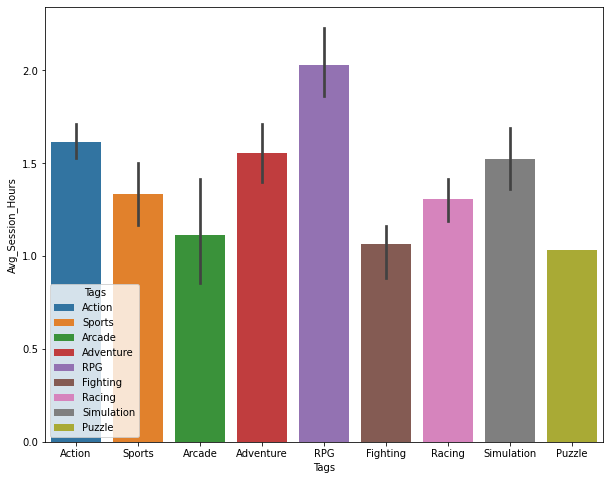

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(data=Genre_Hours_df, x='Tags', y='Avg_Session_Hours', hue='Tags', dodge=False)
plt.show()

Based on the visualized data, RPG games take the most amount of hours per session as it has the highest average hours per session. It is followed by games with action, adventure, and simulation genre. A consideration to note is that RPG games may be more story-oriented and consequently, it would lead to players playing the game longer in sessions.

## What are the ratings of the most played games (hours played) on the PS4 for the first quarter of 2021?

We need current ratings and hours played, as well as the game's title in order to answer this question.

In [41]:
df_curr_rating = df_ps4_combined[['Hours_Played', 'Title','Current_Rating']].sort_values(by=['Hours_Played'], ascending=False)
df_curr_rating = df_curr_rating.dropna()
df_curr_rating = df_curr_rating.reset_index(drop=True)
df_curr_rating

,Hours_Played,Title,Current_Rating
0,93548.333333,fortnite,1.900
1,84386.000000,call of duty black ops cold war,6.925
2,80789.333333,call of duty modern warfare,7.645
3,78739.333333,grand theft auto v,8.950
4,77593.000000,fifa 21,5.215
...,...,...,...
111,2650.000000,world of tanks console,3.300
112,2593.500000,diablo iii reaper of souls ultimate evil edition,7.300
113,2564.000000,detroit become human,7.305
114,2509.500000,ea sports ufc 3,5.400


Add the Current Rating Column.

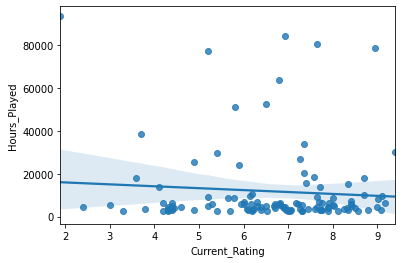

In [42]:
ax = sns.regplot(x="Current_Rating", y="Hours_Played", data=df_curr_rating)

We drop the NaN values.

Partition the values in to x and y axis.

Plot the graph.

Based on the graph observed, the distribution is based on curent rating from gamepressure. However, the rating of a game is not unrelated to the number of players.

## Are the most played games dominated by multiplayer or singleplayer?

The feature 'Mode' contains the game mode of each observation/game. It will be the key feature in answering this question.

In [43]:
df_ps4_combined['Mode'].value_counts()

single / multiplayer          55
single player                 44
multiplayer                   12
massive online multiplayer     9
Multiplayer mode: Internet     1
Name: Mode, dtype: int64

In [ ]:
df_ps4_combined['Mode'] = df_ps4_combined['Mode'].map({'multiplayer': 'multiplayer', 'single player' : 'single player', 'single / multiplayer': 'single / multiplayer', 'massive online multiplayer': 'multiplayer', 'Multiplayer mode: Internet': 'multiplayer'})

In [45]:
df_ps4_combined['Mode'].value_counts()

single / multiplayer    55
single player           44
multiplayer             22
Name: Mode, dtype: int64

We drop the 'Current_Rating' Column.

In [46]:
df_curr_rating = df_curr_rating.drop(['Current_Rating'], axis=1)

We add the 'Mode' Column

In [47]:
df_most_played['Mode'] = df_ps4_combined['Mode']

<ipython-input-47-3e0768d5be5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_played['Mode'] = df_ps4_combined['Mode']


We drop the 'NaN' values.

In [48]:
df_most_played.dropna()

,Hours_Played,Title,Mode
0,93548.333333,fortnite,single / multiplayer
1,84386.000000,call of duty black ops cold war,single / multiplayer
2,80789.333333,call of duty modern warfare,single / multiplayer
3,79539.000000,apex legends,multiplayer
4,78739.333333,grand theft auto v,single player
...,...,...,...
116,2650.000000,world of tanks console,multiplayer
117,2593.500000,diablo iii reaper of souls ultimate evil edition,single / multiplayer
118,2564.000000,detroit become human,single player
119,2509.500000,ea sports ufc 3,single / multiplayer


In [49]:
df_most_played['Mode'].value_counts()

single / multiplayer    55
single player           44
multiplayer             22
Name: Mode, dtype: int64

We split the dataframe in to three based on their corresponding game modes (singleplayer, multiplayer, singleplayer/multiplayer).

In [50]:
# Split the dataframe into their mode
single_player = df_most_played[df_most_played['Mode'] == 'single player']
multiplayer = df_most_played[df_most_played['Mode'] == 'multiplayer']
single_multi = df_most_played[df_most_played['Mode'] == 'single / multiplayer']

# Give x and y values
x_values = ['Single Player', 'Multiplayer', 'Single / Multiplayer']
y_values = [len(single_player.index), len(multiplayer.index), len(single_multi.index)]

We visualize the data using bar graph.

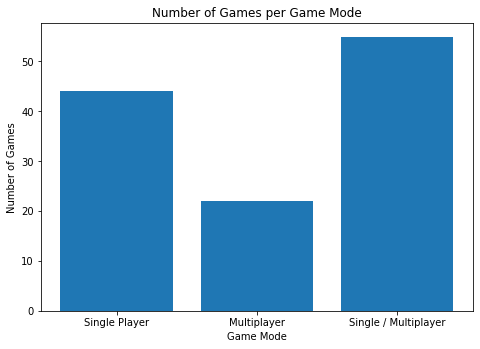

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = x_values
y = y_values
ax.bar(x,y)
plt.xlabel('Game Mode')
plt.ylabel('Number of Games')
plt.title('Number of Games per Game Mode')
plt.show()

The visualization shows that although singleplayer games are still popular, they are still less in numbers compared to singleplayer games that are also able to offer a multiplayer experience. The graph also shows that games that are purely for multiplayer often are not as well regarded or as played as games with singleplayer mode.

## What is the revenue of the most played games (hours played) on the PS4 for the first quarter of 2021 based on singleplayer or multiplayer?

To answer this question, we need the game mode, total sales, as well as the recorded sales in each region per game.

In [52]:
df_ps4_times_sales = df_ps4_combined[['Title', 'Mode', 'Total_Sales (in m)', 'NA_Sales (in m)', 'PAL_Sales (in m)', 'Japan_Sales (in m)', 'Other_Sales (in m)']]

In [53]:
df_ps4_times_sales

,Title,Mode,Total_Sales (in m),NA_Sales (in m),PAL_Sales (in m),Japan_Sales (in m),Other_Sales (in m)
0,fortnite,single / multiplayer,0.89,0.42,0.32,NaN,0.15
1,call of duty black ops cold war,single / multiplayer,NaN,NaN,NaN,NaN,NaN
2,call of duty modern warfare,single / multiplayer,NaN,NaN,NaN,NaN,NaN
3,apex legends,multiplayer,NaN,NaN,NaN,NaN,NaN
4,grand theft auto v,single player,19.39,6.06,9.71,0.60,3.02
...,...,...,...,...,...,...,...
116,world of tanks console,multiplayer,NaN,NaN,NaN,NaN,NaN
117,diablo iii reaper of souls ultimate evil edition,single / multiplayer,NaN,NaN,NaN,NaN,NaN
118,detroit become human,single player,NaN,NaN,NaN,NaN,NaN
119,ea sports ufc 3,single / multiplayer,0.97,0.40,0.41,0.01,0.16


Since there are multiple variations of multiplayer games such as "Massively Multiplayer" and "Multiplayer mode: Internet", we classify the observations with these game modes as multiplayer as well.

In [54]:
df_ps4_times_sales['Mode'] = df_ps4_times_sales['Mode'].map({'multiplayer': 'multiplayer', 'single player' : 'single player', 'single / multiplayer': 'single / multiplayer', 'massive online multiplayer': 'multiplayer', 'Multiplayer mode: Internet': 'multiplayer'})

<ipython-input-54-5f9f7f715b8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ps4_times_sales['Mode'] = df_ps4_times_sales['Mode'].map({'multiplayer': 'multiplayer', 'single player' : 'single player', 'single / multiplayer': 'single / multiplayer', 'massive online multiplayer': 'multiplayer', 'Multiplayer mode: Internet': 'multiplayer'})


In [55]:
df_ps4_times_sales = df_ps4_times_sales.reset_index(drop=True)
df_ps4_times_sales

,Title,Mode,Total_Sales (in m),NA_Sales (in m),PAL_Sales (in m),Japan_Sales (in m),Other_Sales (in m)
0,fortnite,single / multiplayer,0.89,0.42,0.32,NaN,0.15
1,call of duty black ops cold war,single / multiplayer,NaN,NaN,NaN,NaN,NaN
2,call of duty modern warfare,single / multiplayer,NaN,NaN,NaN,NaN,NaN
3,apex legends,multiplayer,NaN,NaN,NaN,NaN,NaN
4,grand theft auto v,single player,19.39,6.06,9.71,0.60,3.02
...,...,...,...,...,...,...,...
116,world of tanks console,multiplayer,NaN,NaN,NaN,NaN,NaN
117,diablo iii reaper of souls ultimate evil edition,single / multiplayer,NaN,NaN,NaN,NaN,NaN
118,detroit become human,single player,NaN,NaN,NaN,NaN,NaN
119,ea sports ufc 3,single / multiplayer,0.97,0.40,0.41,0.01,0.16


We store the mean for each sales per region.

In [56]:
df_ps4_times_sales_agg = df_ps4_times_sales.groupby('Mode').agg(
    Total_Sales = ('Total_Sales (in m)', 'mean'),
    NA_Sales = ('NA_Sales (in m)', 'mean'),
    PAL_Sales = ('PAL_Sales (in m)', 'mean'),
    Japan_Sales = ('Japan_Sales (in m)', 'mean'),
    Other_Sales = ('Other_Sales (in m)', 'mean'),
)

In [57]:
df_ps4_times_sales_agg

,Total_Sales,NA_Sales,PAL_Sales,Japan_Sales,Other_Sales
Mode,,,,,
multiplayer,2.014286,0.724286,0.862857,0.130000,0.311429
single / multiplayer,3.309000,1.148500,1.503500,0.174375,0.518000
single player,4.764000,1.672667,2.138000,0.226429,0.744667


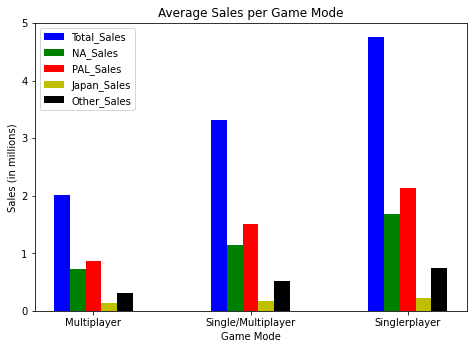

In [58]:
import numpy as np
import matplotlib.pyplot as plt
Label = ['Multiplayer', 'Single/Multiplayer', 'Singlerplayer']
fig = plt.figure()
X = np.arange(len(Label))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.20,df_ps4_times_sales_agg['Total_Sales'], color = 'b', width = 0.10,label = 'Total_Sales')
ax.bar(X - 0.10,df_ps4_times_sales_agg['NA_Sales'], color = 'g', width = 0.10,label = 'NA_Sales')
ax.bar(X + 0.00,df_ps4_times_sales_agg['PAL_Sales'], color = 'r', width = 0.10,label = 'PAL_Sales')
ax.bar(X + 0.10,df_ps4_times_sales_agg['Japan_Sales'], color = 'y', width = 0.10,label = 'Japan_Sales')
ax.bar(X + 0.20,df_ps4_times_sales_agg['Other_Sales'], color = 'black', width = 0.10,label = 'Other_Sales')
plt.xticks(X, Label)
plt.xlabel("Game Mode")
plt.ylabel("Sales (in millions)")
plt.title("Average Sales per Game Mode")
plt.legend()
plt.show()

Based on base game sales alone, singleplayer games tend to profit or have the highest sales margin on average, with games with both singleplayer and multiplayer game modes having a healthy sale margin similarly to singleplayer only games as well. Multiplayer only games have the lowest sales margin out of the three classes, with a total sales margin being less than 1 million.

A consideration to note is that the data only takes into account base game sales sold, and does not include in-app purchases and deluxe content that a user might spend on after purchasing a base game.


### Total Revenue

We also compute for the total revenue per region based on game mode.

In [59]:
df_ps4_times_sales_extended = df_ps4_times_sales
df_ps4_times_sales_extended.columns = ['Title', 'Mode', 'Total_Sales', 'NA_Sales', 'PAL_Sales', 'Japan_Sales', 'Other_Sales']
df_ps4_times_sales_extended = df_ps4_times_sales_extended.melt(id_vars=["Title", "Mode"], var_name="Type", value_name="Sales")
df_ps4_times_sales_extended

,Title,Mode,Type,Sales
0,fortnite,single / multiplayer,Total_Sales,0.89
1,call of duty black ops cold war,single / multiplayer,Total_Sales,NaN
2,call of duty modern warfare,single / multiplayer,Total_Sales,NaN
3,apex legends,multiplayer,Total_Sales,NaN
4,grand theft auto v,single player,Total_Sales,19.39
...,...,...,...,...
600,world of tanks console,multiplayer,Other_Sales,NaN
601,diablo iii reaper of souls ultimate evil edition,single / multiplayer,Other_Sales,NaN
602,detroit become human,single player,Other_Sales,NaN
603,ea sports ufc 3,single / multiplayer,Other_Sales,0.16


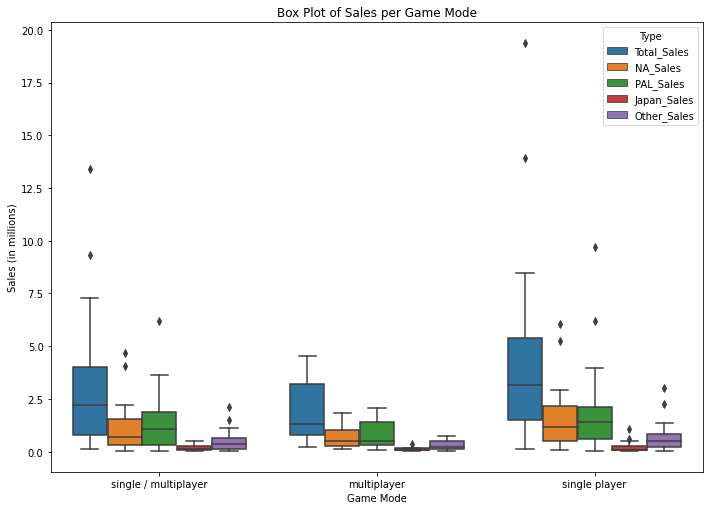

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("Box Plot of Sales per Game Mode")
ax = sns.boxplot(x="Mode", y="Sales", hue='Type', data=df_ps4_times_sales_extended)
plt.xlabel("Game Mode")
plt.ylabel("Sales (in millions)")

plt.show()

In this visualization, we can see the total sales compared to the previous graph, and the outliers (which affect the mean in the previous graph) are also visualized. Based on the visualized data, the total sales of single player games is still greater than both multiplayer games and games with both multiplayer and singleplayer game mode. 

### Based on story and gameplay, what are the similarities between the most played games (hours played) on the PS4 for the first quarter of 2021?

To answer this we need to find the most common words in the game descriptions. We will be using a wordcloud which requires all the text to be in a single string.

In [62]:
text = " ".join(str(review) for review in df_ps4_combined.Game_Description)

Define a function for plotting the word cloud

In [61]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

We create a list of stopwords. We initialie it with the STOPWORDS package and add our selected words.

In [63]:
#stopwords
stopwords = set(STOPWORDS)
stopwords.update(["game", "character", "player", 'players','mode', 'one','gameplay', 'developed', 'developer', 'â', 's', 'games', 
                  'play', 'developers', 'new', 'PS4', 'will','u', 'created', 'including', 'system', 'XONE','PC', 'based', 'etc', 'e', 
                  'nan', 'many', 'Creed', 'among', 'us', 'title','feature','much', 'well', 'known', 'allow', 'production','offer',
                  'studio', 'called', 'set', 'playstation'])

Generate the word cloud

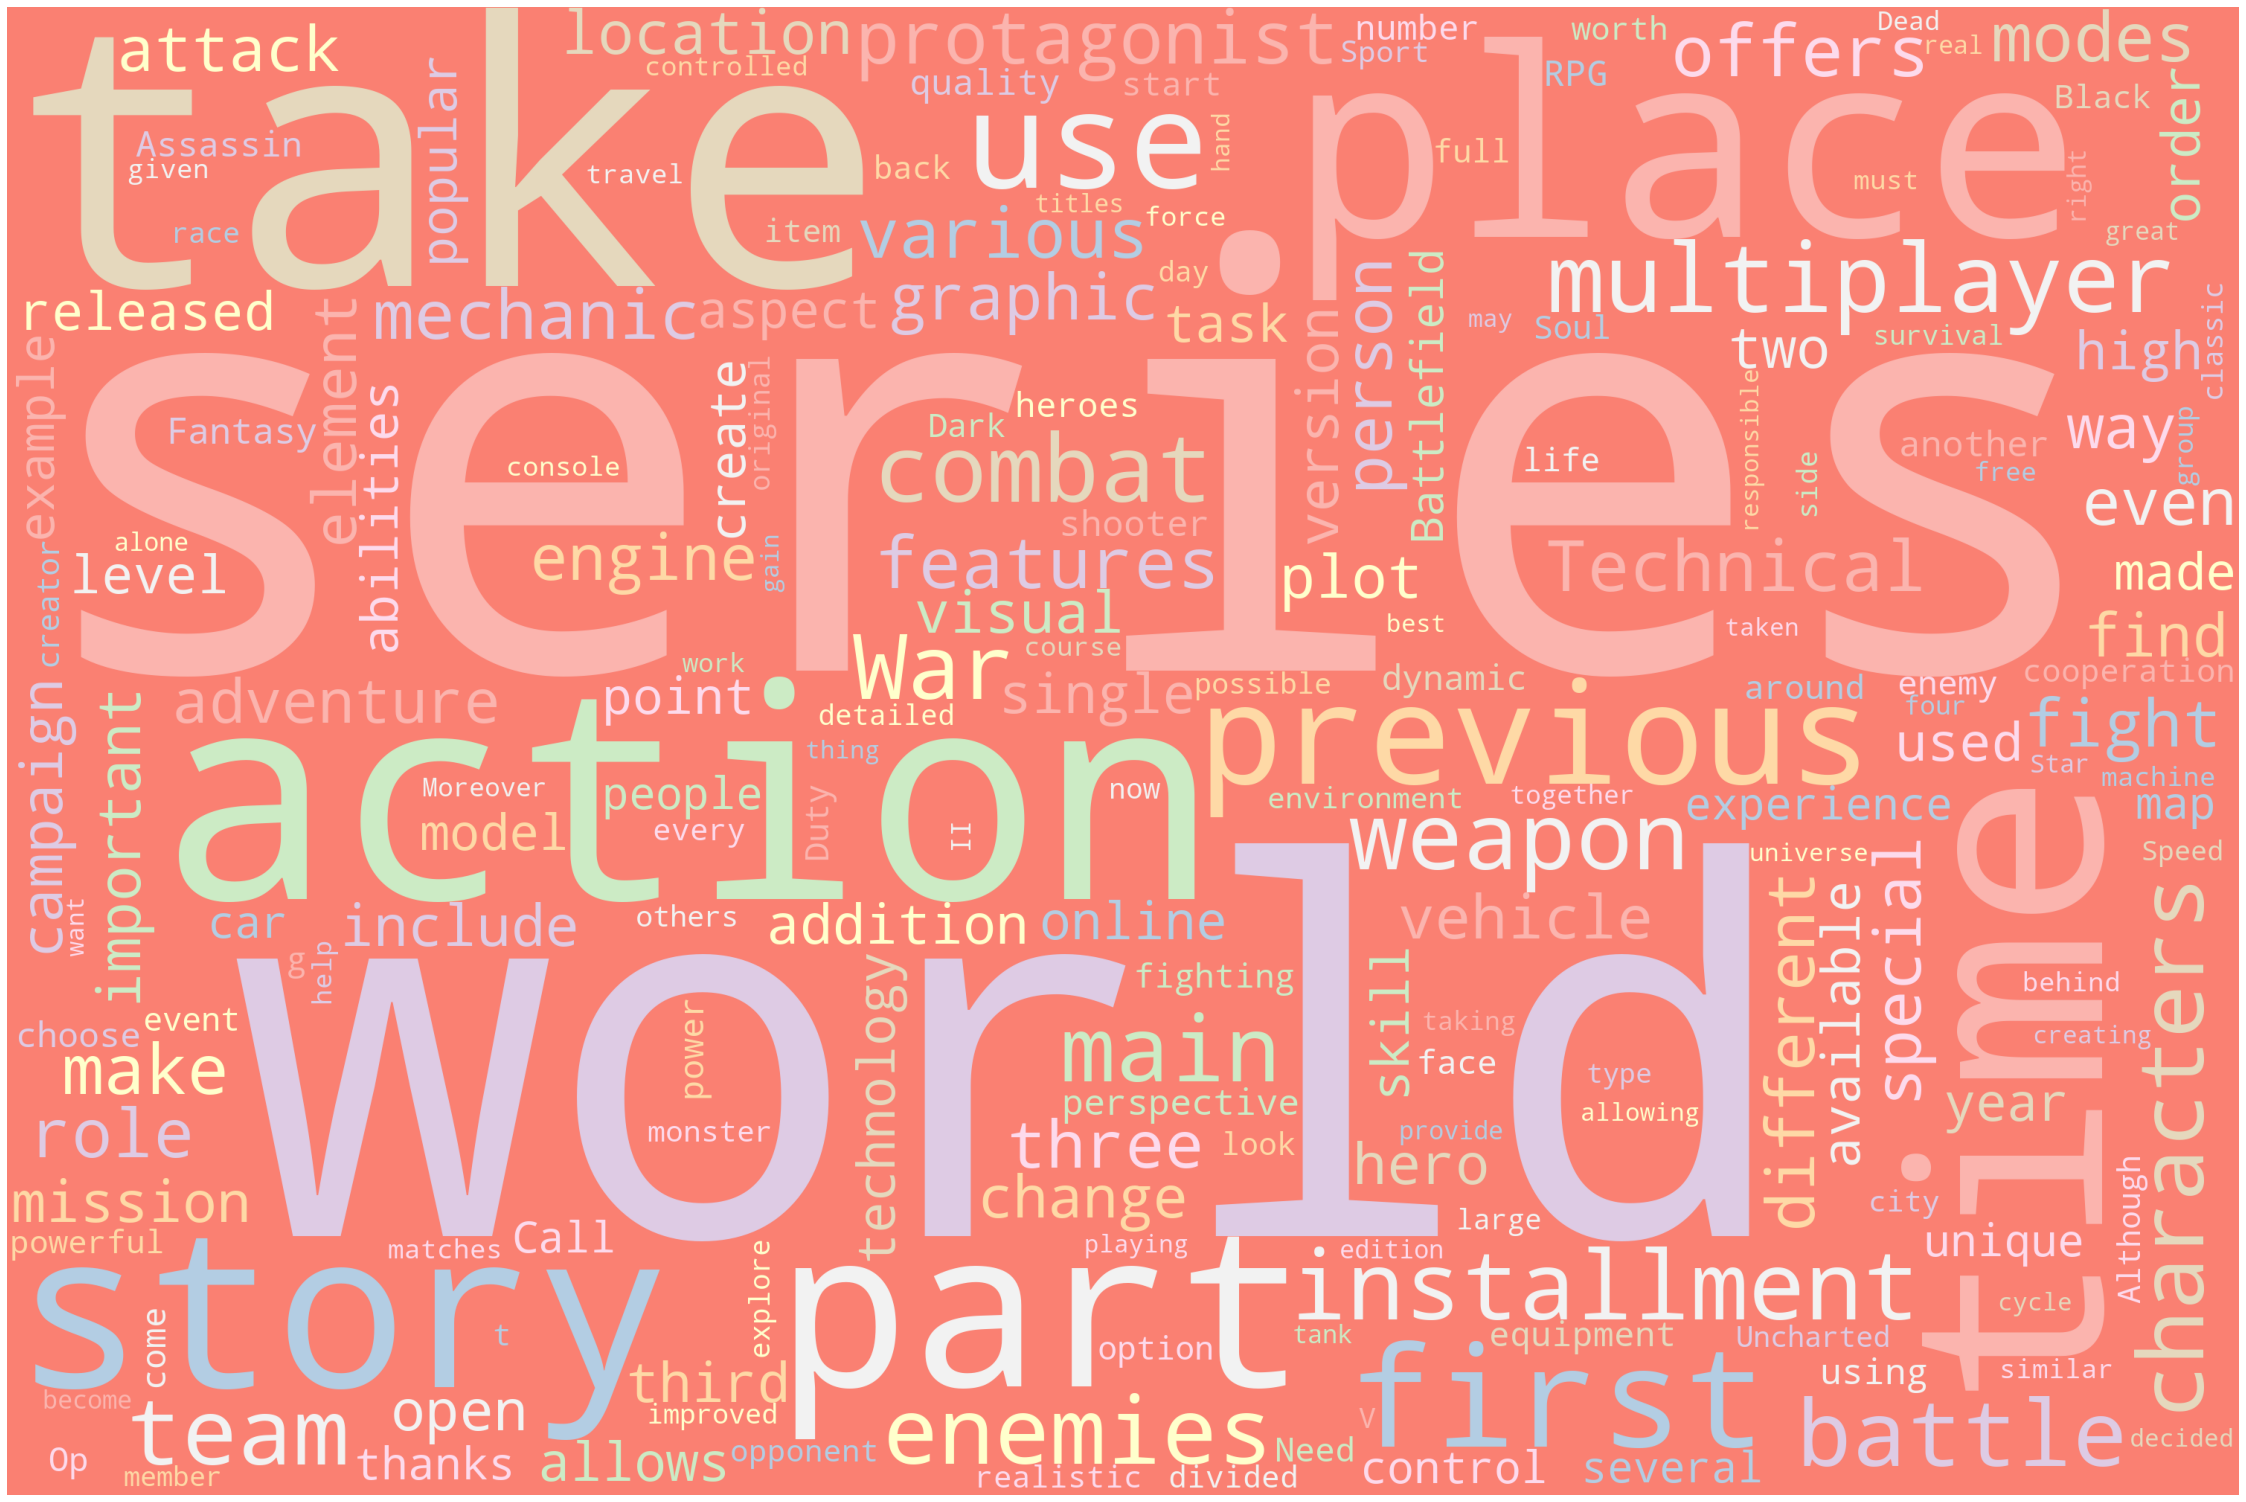

In [64]:
wc = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stopwords).generate(text)
# Plot
plot_cloud(wc)

For a better visualization we will mask our wordcloud with a controller outline

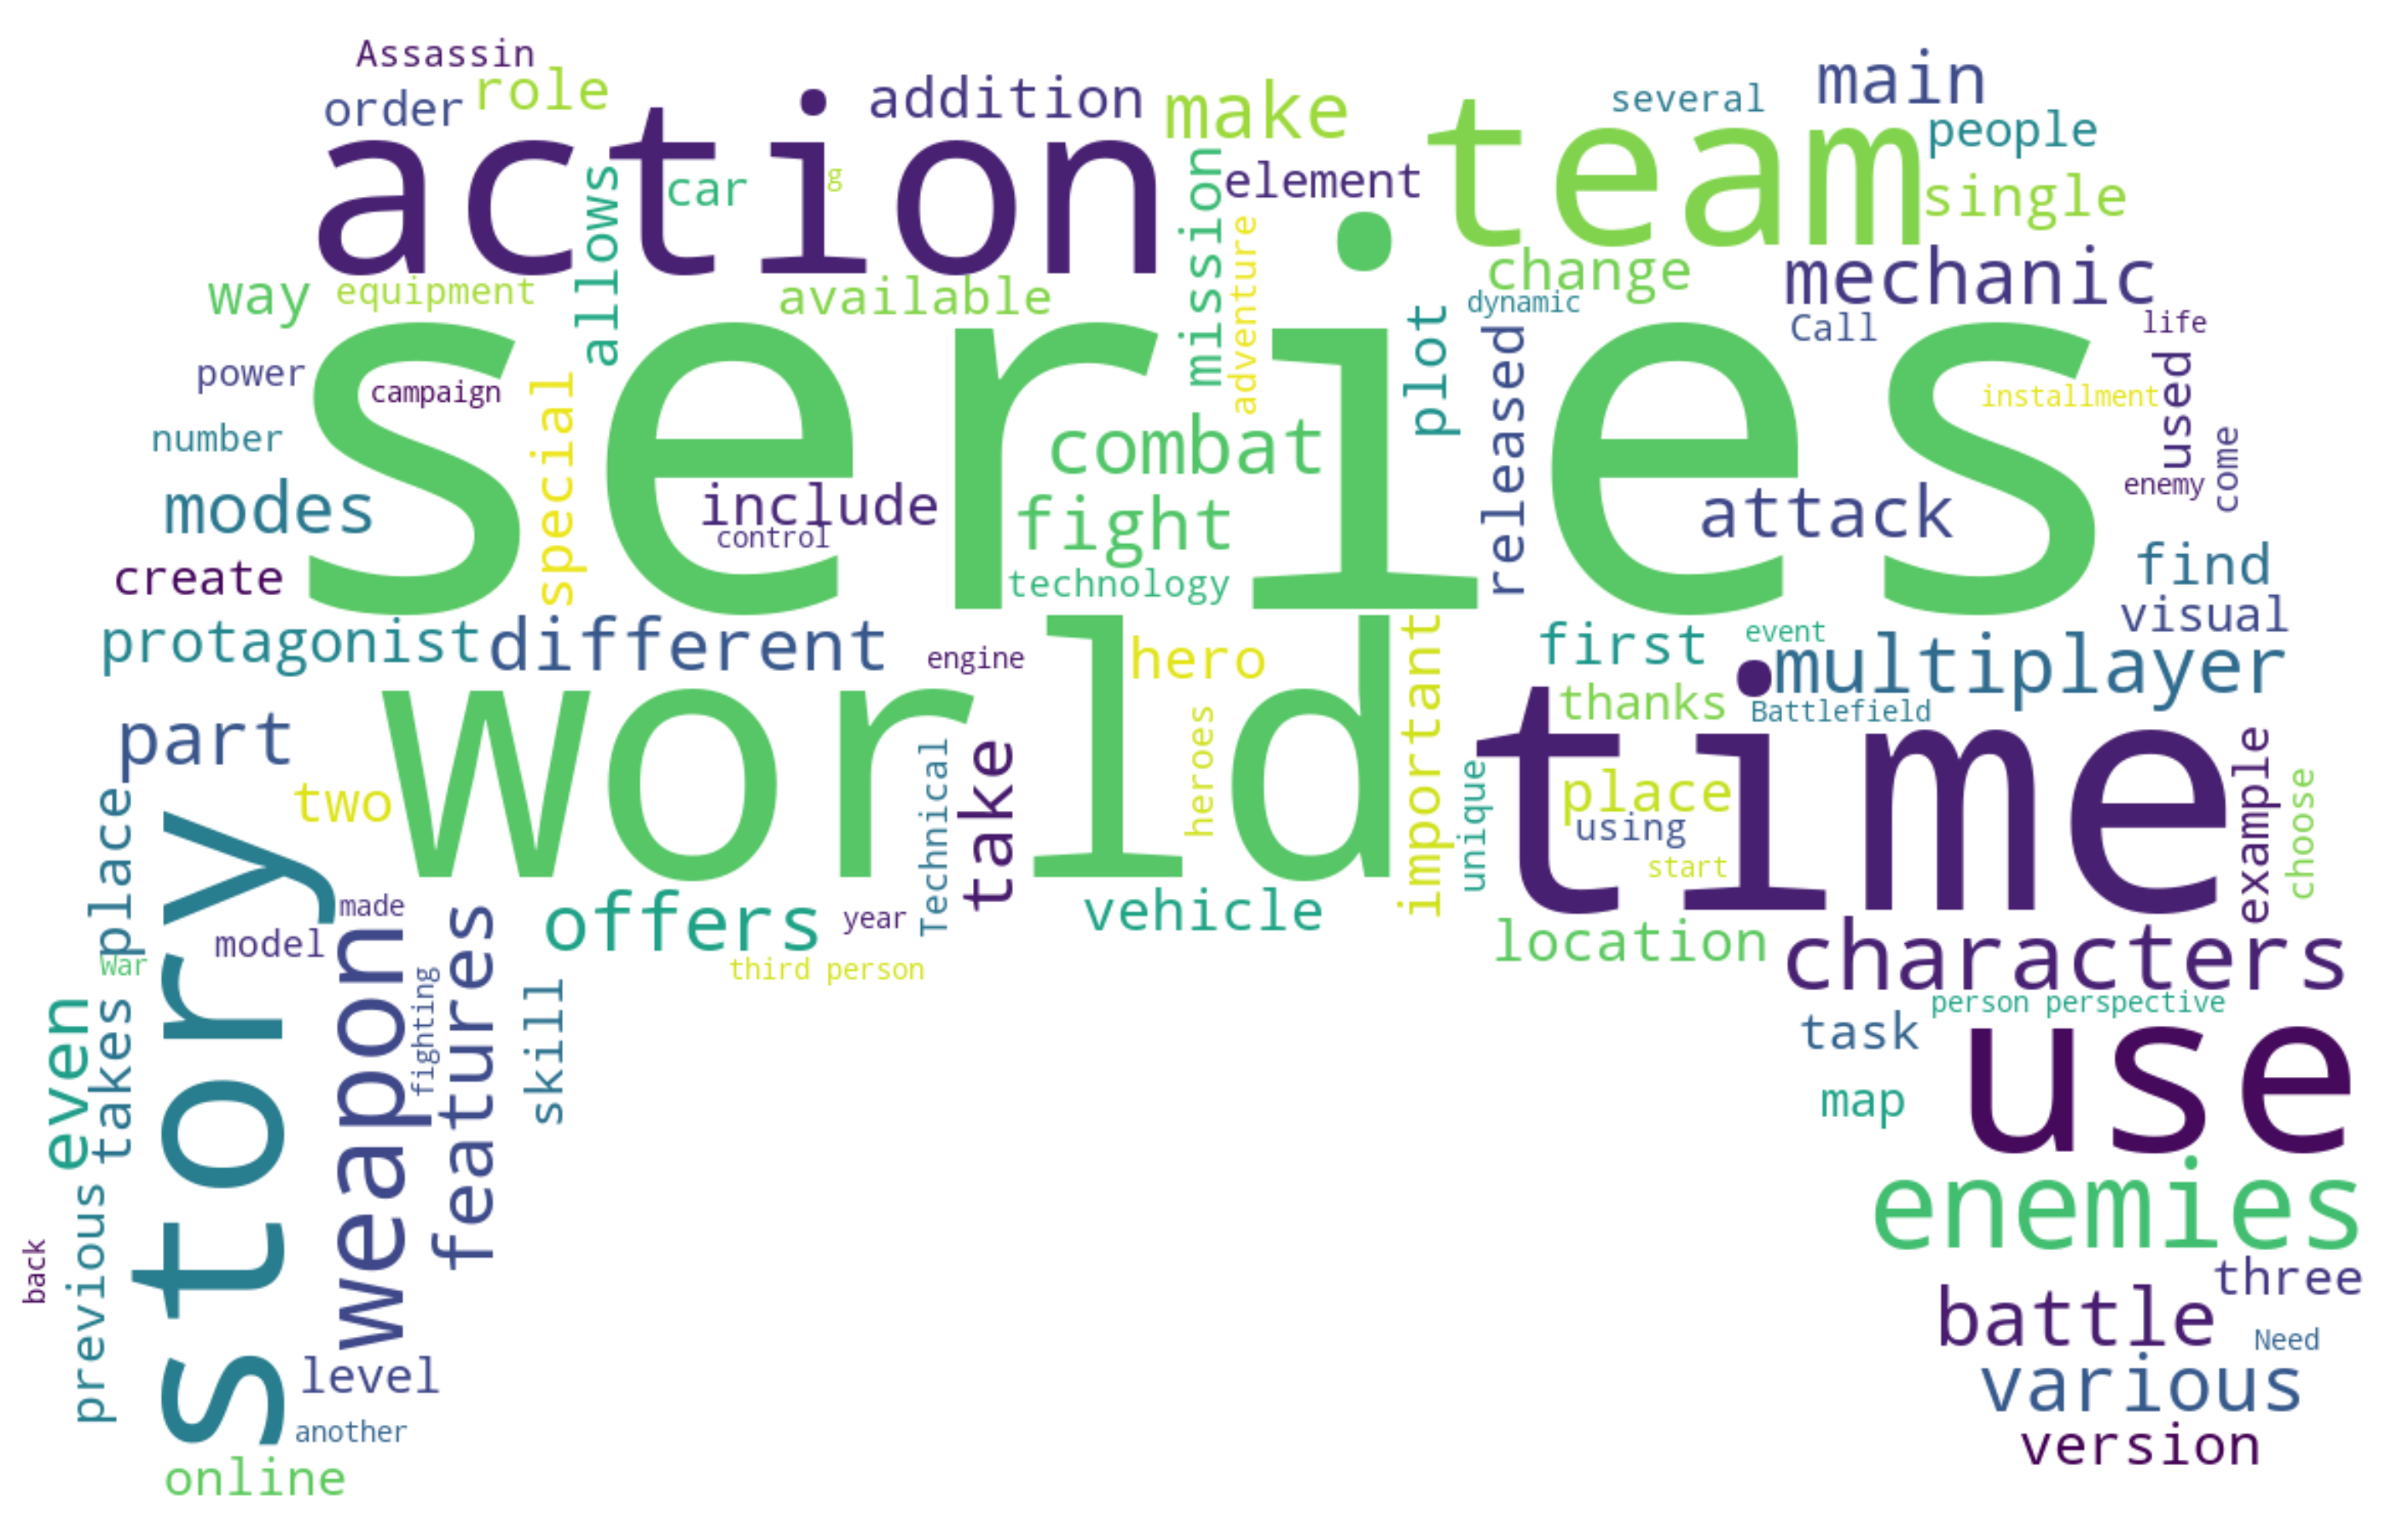

In [65]:
mask = np.array(Image.open('controller.png'))
wc = WordCloud(stopwords=stopwords,
               mask=mask, background_color="white",
               max_words=100, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(text)
plt.figure(figsize=(50,50))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Based on the wordcloud containing the description of each game in the top 100, the most popular elements between all games in the top 100 include being part of a defined series of games, having its own world, being an action game, a good story and being team-based. 

### Conclusion

   In conclusion, PS4 games that garner the most hours played by gamers are often singleplayer games with multiplayer options. In the sample dataset, action games gather the most total play time in the platform, with 57% of the top 100 games being in the action genre. Singleplayer games garner the best sales compared to multiplayer games and games with both singleplayer and multiplayer game modes. It is also found that among the most played games are often part of a defined game series, contain story elements, in the action genre, has its own world, or team-based. Furthermore, the rating of a game does not really correlate with a game's overall number of players or the total hours played. 

### Recommendations
* It is recommended to find better sources of data, specifically those that have little to no null values and have information regarding games sales, both base game sales and sales that include in-app purchases. Larger datasets could also provide more information due to large size of data to be analyzed.

* It is also recommended to more easily accessible datasets instead of scraping data from website because that process is time-consuming.

* Other gaming platforms, such as PC and XBox could also be taken in to account for a wider scope of study. Games can be compared based on their sales, average player sessions and ratings across multiple platforms.